### 导入autoload扩展

In [1]:
%load_ext autoreload
%autoreload 2

### 下载并载入[Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist)数据集

In [2]:
from utils import *
from full_connect_network import FullConnectNet
from solve import Solver

data = download_minist()
data['X_train'] = data['X_train']
data['y_train'] = data['y_train']

### 封装训练函数

In [13]:
def train_with_params(
        hidden_dims, 
        activation, 
        reg: float=0.01, 
        update_rule: str='sgd',
        optim_config: Dict={
            'learning_rate': 1e-3
        },
        lr_decay: float=0.9,
        batch_size: int=64,
        iters: int=6000,
        epochs: int=10,
        data: Dict=data
    ):
    
    three_layer_model = FullConnectNet(
        hidden_dims=hidden_dims, 
        types=activation, 
        reg=reg, 
    )

    three_layer_net = Solver(
        model=three_layer_model, 
        data=data,
        update_rule=update_rule,
        optim_config=optim_config,
        lr_decay=lr_decay,
        batch_size=batch_size,
        print_iter=500,
        iters=iters,
        num_epochs=epochs
    )

    three_layer_net.train() 

    plot_stats_single(three_layer_net)    
    return three_layer_net

### 过拟合小数据集

(Time   0.00 s; Iteration     1 /  2000) loss 2.363608
[Epoch  0 / 10] train accuracy: 0.110000; val accuracy: 0.104200
[Epoch  1 / 10] train accuracy: 0.704000; val accuracy: 0.649800
[Epoch  2 / 10] train accuracy: 0.820000; val accuracy: 0.708300
(Time   1.59 s; Iteration   501 /  2000) loss 0.466822
[Epoch  3 / 10] train accuracy: 0.902000; val accuracy: 0.756000
[Epoch  4 / 10] train accuracy: 0.944000; val accuracy: 0.769200
[Epoch  5 / 10] train accuracy: 0.960000; val accuracy: 0.774100
(Time   3.09 s; Iteration  1001 /  2000) loss 0.234394
[Epoch  6 / 10] train accuracy: 0.976000; val accuracy: 0.771700
[Epoch  7 / 10] train accuracy: 0.994000; val accuracy: 0.775800
(Time   4.62 s; Iteration  1501 /  2000) loss 0.153984
[Epoch  8 / 10] train accuracy: 0.998000; val accuracy: 0.776700
[Epoch  9 / 10] train accuracy: 1.000000; val accuracy: 0.775000
[Epoch 10 / 10] train accuracy: 1.000000; val accuracy: 0.777300


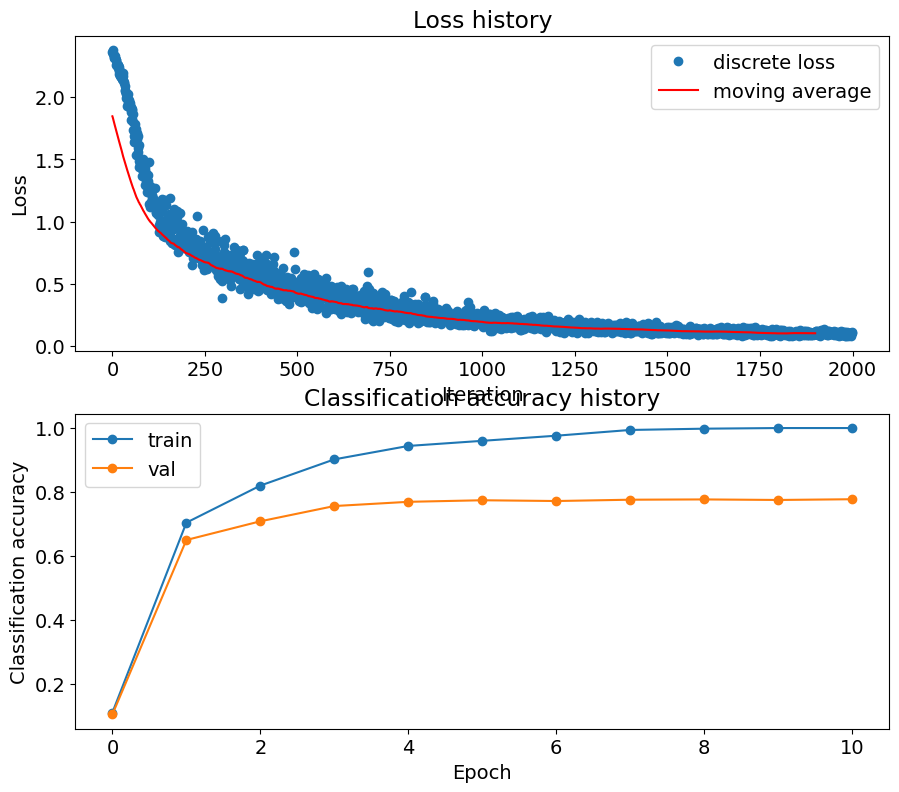

In [12]:
np.random.seed(419)
# get the first 500 samples of the testing dataset
small_data = data
small_data['X_train'] = small_data['X_train'][:500]
small_data['y_train'] = small_data['y_train'][:500]

hidden_dims = [128, 64]
activation = ['relu']
iters=2000

small_nn = train_with_params(
    hidden_dims=hidden_dims,
    activation=activation,
    iters=iters,
    data=small_data
)

### 尝试不同的激活函数

### 权重初始化大小，正则化参数，学习率，学习率下降

### 不同的更新方式

### 完整训练

(Time   0.00 s; Iteration     1 / 60000) loss 2.304774
[Epoch  0 / 30] train accuracy: 0.111167; val accuracy: 0.113900
(Time   2.08 s; Iteration   501 / 60000) loss 0.723685
(Time   3.84 s; Iteration  1001 / 60000) loss 0.621492
(Time   5.65 s; Iteration  1501 / 60000) loss 0.363826
[Epoch  1 / 30] train accuracy: 0.851733; val accuracy: 0.838200
(Time   7.87 s; Iteration  2001 / 60000) loss 0.432966
(Time   9.83 s; Iteration  2501 / 60000) loss 0.213456
(Time  11.99 s; Iteration  3001 / 60000) loss 0.340165
(Time  14.11 s; Iteration  3501 / 60000) loss 0.285024
[Epoch  2 / 30] train accuracy: 0.878183; val accuracy: 0.858600
(Time  16.36 s; Iteration  4001 / 60000) loss 0.325864
(Time  18.06 s; Iteration  4501 / 60000) loss 0.179470
(Time  19.67 s; Iteration  5001 / 60000) loss 0.170526
(Time  21.56 s; Iteration  5501 / 60000) loss 0.216958
[Epoch  3 / 30] train accuracy: 0.888883; val accuracy: 0.865400
(Time  23.73 s; Iteration  6001 / 60000) loss 0.358683
(Time  25.61 s; Iteration

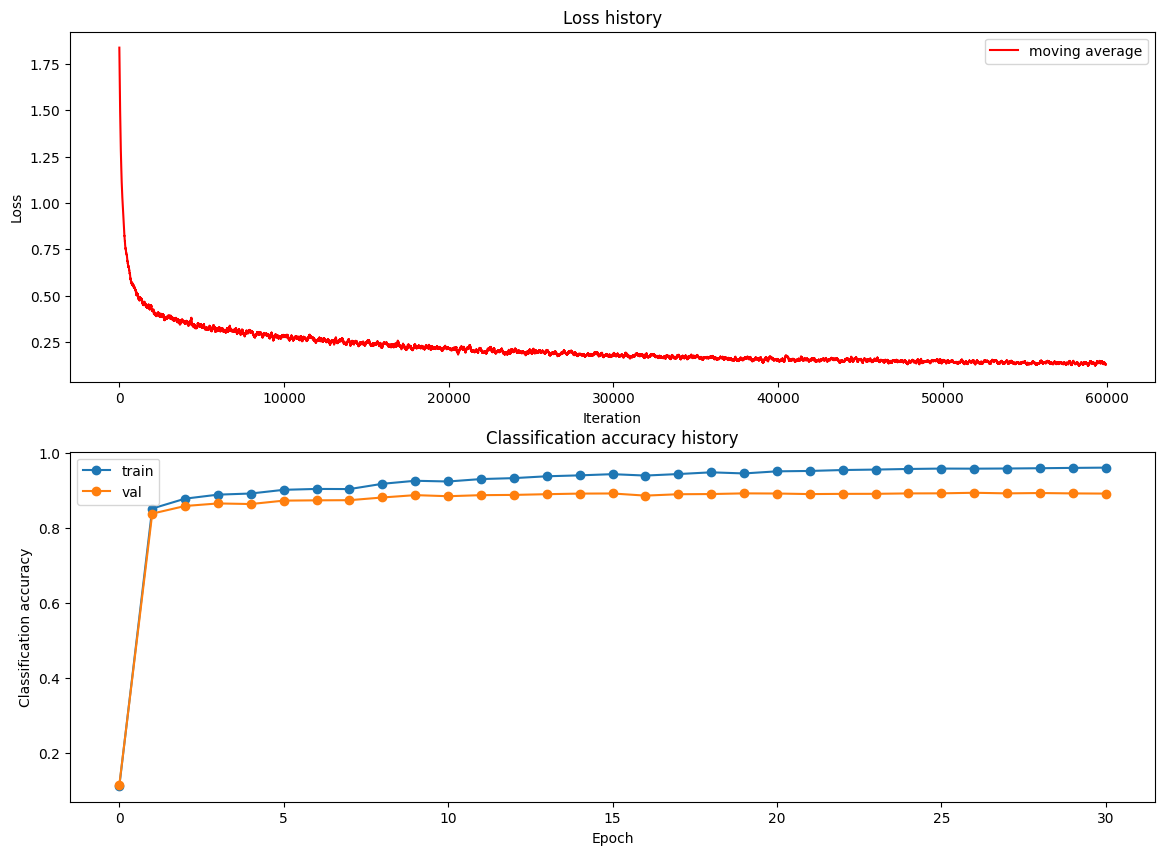

Model has been saved in model\fcnn


In [9]:
np.random.seed(419)

hidden_dims = [128, 64]
activation = ['relu', 'tanh']
reg = 1e-3

update_rule = 'sgd'
optim_config = {
    'learning_rate': 5e-3
}
lr_decay=0.9
batch_size=64
print_iter=500
iters=60000
epochs=30

nn = train_with_params(
        hidden_dims=hidden_dims, 
        types=activation, 
        reg=reg, 
        update_rule=update_rule,
        optim_config=optim_config,
        lr_decay=lr_decay,
        batch_size=batch_size,
        iters=iters,
        epochs=epochs
    )

# model_path = 'fcnn'
# nn.save(model_path)

```python
# sgd_momentum
{
    hidden_dims = [128, 64, 32]
    activation = ['relu']
    reg = 1e-3
    loss = 'ce'
    three_layer_model = FullConnectNet(
        hidden_dims=hidden_dims, 
        types=activation, 
        reg=reg, 
        loss=loss
    )
    three_layer_net = Solver(
        model=three_layer_model, 
        data=data,
        update_rule='sgd_momentum',
        optim_config = {
            'learning_rate': 1e-2
        },
        lr_decay=0.9 / 0.8,
        batch_size=64,
        print_iter=100
    )
}
# adam
{
    hidden_dims = [64, 32]
    activation = ['relu']
    reg = 1e-3
    loss = 'ce'

    update_rule = 'adam'
    optim_config = {
        'learning_rate': 1e-4
    }
    lr_decay=0.8
    batch_size=128
    print_iter=500
    iters=20000
}
# sgd
{
    hidden_dims = [128, 64]
    activation = ['relu']
    reg = 1e-3
    loss = 'ce'

    update_rule = 'sgd'
    optim_config = {
        'learning_rate': 5e-3
    }
    lr_decay=0.9
    batch_size=64
    print_iter=500
    iters=2000
}

```